### Student Information
Name:Noa Moshe

Student ID:X1080014

GitHub ID: noayesa

Kaggle name: Noa Moshe

Kaggle private scoreboard snapshot:

![Snapshot](place.png)

(I was 8th place during the original deadline, so please take that into concideration as I submitted my assignment on time)

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM19-Lab2-Master Repo](https://github.com/EvaArevalo/DM19-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/179d01d4dd984fc5ac45a894822479dd) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Nov. 23rd 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM19-Lab2-Homework](https://github.com/EvaArevalo/DM19-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th 11:59 pm, Tuesday)__. 

### Begin Assignment Here

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [5]:
# Answer here (Vector Counter)
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



train_count_vect = CountVectorizer()
train_df_counts = train_count_vect.fit_transform(train_df.text)
test_count_vect = CountVectorizer()
test_df_counts = test_count_vect.fit_transform(test_df.text)        #TF Matrix for both training and test


train_term_frequencies = []
for j in range(0,train_df_counts.shape[1]):                   ##### for training, doing frequencies
    train_term_frequencies.append(sum(train_df_counts[:,j].toarray()))
    
train_term_frequencies = np.asarray(train_df_counts.sum(axis=0))[0]

test_term_frequencies = []
for j in range(0,test_df_counts.shape[1]):                      ##### for testing, doing frequencies
    test_term_frequencies.append(sum(test_df_counts[:,j].toarray()))
    
#=========================================================================================================================#
#sorting the frequencies and plotting top 30
    
train_term_frequencies = np.asarray(train_df_counts.sum(axis=0))[0]

freqTrain =  {'freq':train_term_frequencies, 'words':train_count_vect.get_feature_names()}

freqDFtrain = pd.DataFrame(data=freqTrain)

freqDFtrain.sort_values(by=['freq'], inplace=True, ascending=False) #sorting them



#for test now:

test_term_frequencies = np.asarray(test_df_counts.sum(axis=0))[0]

freqTest =  {'freq':test_term_frequencies, 'words':test_count_vect.get_feature_names()}

freqDFtest = pd.DataFrame(data=freqTest)

freqDFtest.sort_values(by=['freq'], inplace=True, ascending=False) #sorting them




top 30 frequent training set words


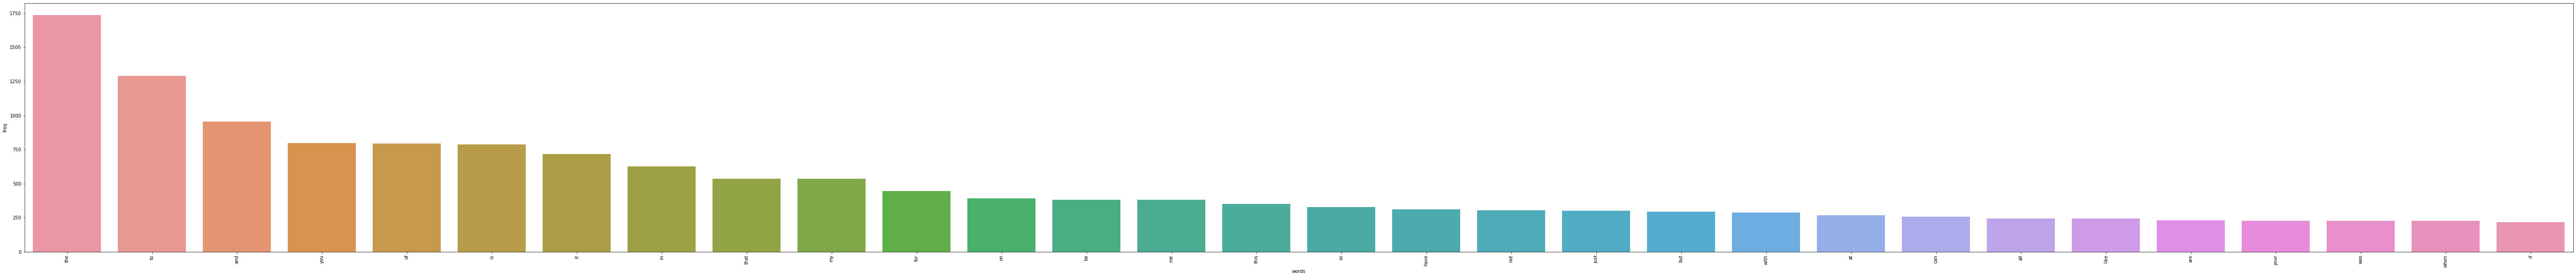

In [6]:
print("top 30 frequent training set words")
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=freqDFtrain[:30].words,
            y=freqDFtrain[:30].freq)   #plotting
g.set_xticklabels(freqDFtrain[:30].words, rotation = 90);

top 30 frequent testing set words


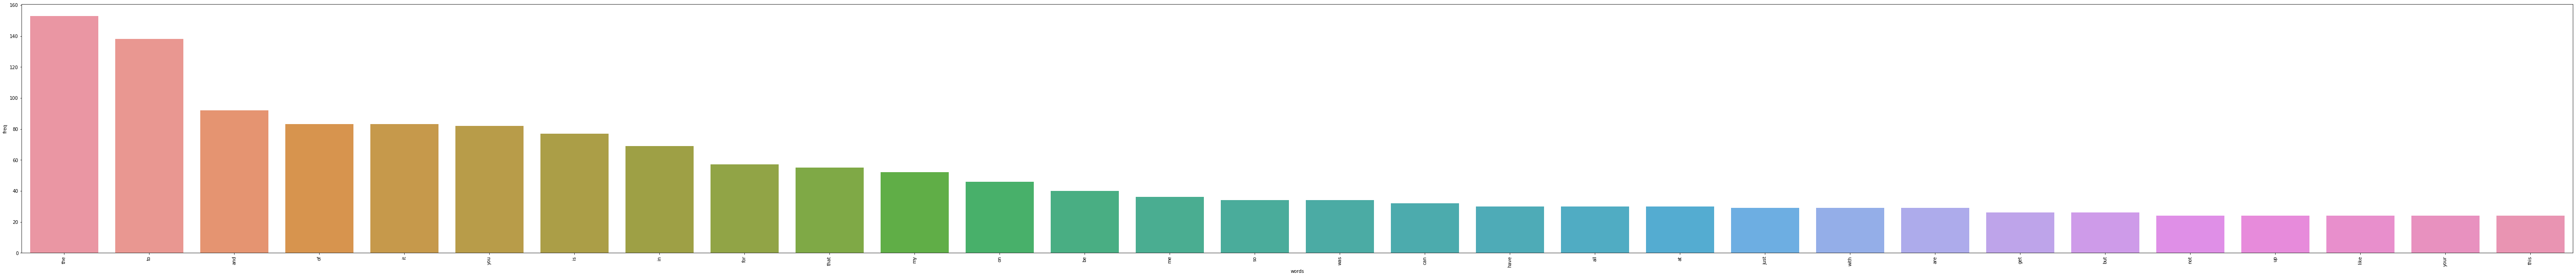

In [7]:
print("top 30 frequent testing set words")
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=freqDFtest[:30].words,
            y=freqDFtest[:30].freq)   #plotting
g.set_xticklabels(freqDFtest[:30].words, rotation = 90);

### Using Bag of Words

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [10]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [11]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

(3613, 500)

In [12]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names()
feature_names_500[100:110]

['cheerful',
 'cheering',
 'cheery',
 'come',
 'comes',
 'could',
 'country',
 'cry',
 'crying',
 'customer']

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [13]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer #TF-IDF

vectorizer_TFIDF = TfidfVectorizer()
TF_IDF_matrix = vectorizer_TFIDF.fit_transform(train_df[:1000].text)
print("freature names of 100 untill 110:")
print(vectorizer_TFIDF.get_feature_names()[100:110])


freature names of 100 untill 110:
['abhijit_iyer', 'ability', 'about', 'above', 'abraham', 'absolute', 'absolutely', 'abundance', 'abusive', 'abysmal']


In [14]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion'] #label

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion'] #label

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [15]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'fear', 'fear', 'fear', 'sadness', 'anger', 'fear', 'fear',
       'anger', 'joy'], dtype=object)

---
## 4. Results Evaluation

In [16]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.66


In [17]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

             precision    recall  f1-score   support

      anger       0.70      0.68      0.69        84
       fear       0.68      0.68      0.68       110
        joy       0.62      0.67      0.65        79
    sadness       0.63      0.59      0.61        74

avg / total       0.66      0.66      0.66       347



In [18]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 11  7  9]
 [11 75 14 10]
 [ 6 13 53  7]
 [ 7 12 11 44]]


In [19]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

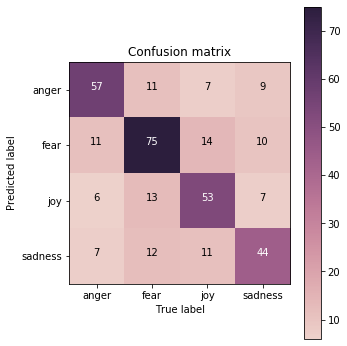

In [20]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [21]:
# Answer here

#The diagonals are the number of correct classification, the darker the color is the higher the number is meaning more 
#correct classification.
#so predicted label is what we classified as, meaning (anger,fear) were classified as fear when they are actually anger.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [26]:
# Answer here

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split


#using BOW


mnb2 = MultinomialNB()
mnb2.fit(X_train, y_train)

print('testing accuracy: {}'.format(mnb2.score(X_test, y_test)))


testing accuracy: 0.7118155619596542


---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [27]:
# Answer here
#We see that accuracy for Naive Bayes is 0.7118155619596542 while Decision Tree is 0.66 (average).
#Decision Tree tends to over fit, thus we can use pre/post prunning. In this case we did not do prunning.
#On the otherhand Naive Bayes does not tend to overfit, thus, it's test accuracy is higher.


---

---
## 6. Deep Learning


### 6.1 Prepare data (X, y)

In [28]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

Using TensorFlow backend.
C:\Users\Noa\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Noa\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Noa\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Noa\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: Fu

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [29]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 573       anger
1094       fear
3180    sadness
416       anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [30]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_) #500 features from the BOW
print('output_shape: ', output_shape) #label [0,0,0,1] for example

input_shape:  500
output_shape:  4


In [31]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32064     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_2 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
_________________________________________________________________
softmax_1 (Softmax)          (None, 4)                 0   

### 6.4 Train

In [32]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Train on 3613 samples, validate on 347 samples
Epoch 1/25
3613/3613 [==============================] - 2s 483us/step - loss: 1.3294 - accuracy: 0.3623 - val_loss: 1.2775 - val_accuracy: 0.4150
Epoch 2/25
3613/3613 [==============================] - 0s 120us/step - loss: 0.9941 - accuracy: 0.6269 - val_loss: 0.9397 - val_accuracy: 0.6254
Epoch 3/25
3613/3613 [==============================] - 0s 107us/step - loss: 0.5916 - accuracy: 0.7941 - val_loss: 0.7883 - val_accuracy: 0.7061
Epoch 4/25
3613/3613 [==============================] - 0s 105us/step - loss: 0.4135 - accuracy: 0.8489 - val_loss: 0.7904 - val_accuracy: 0.6916
Epoch 5/25
3613/3613 [==============================] - 0s 98us/step - loss: 0.3267 - accuracy: 0.8857 - val_loss: 0.7887 - val_accuracy: 0.6888
Epoch 6/25
3613/3613 [==============================] - 0s 92us/step - loss: 0.2695 - accuracy: 0.9100 - val_loss: 0.8603 - val_accuracy: 0.6744
Epoch 7/25
3613/3613 [==============================] - 0s 103us/step - loss: 0

### 6.5 Predict on testing data

In [33]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

array([[4.4398951e-12, 1.0000000e+00, 2.2496215e-12, 2.3191141e-10],
       [8.2244223e-01, 1.7269410e-01, 3.7309635e-04, 4.4906903e-03],
       [7.0699381e-05, 9.9856758e-01, 9.4518393e-05, 1.2672227e-03],
       [8.8036861e-05, 4.9485606e-01, 2.6373307e-03, 5.0241852e-01],
       [3.5892876e-06, 1.5669927e-04, 2.8778382e-05, 9.9981099e-01]],
      dtype=float32)

In [34]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

C:\Users\Noa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['fear', 'anger', 'fear', 'sadness', 'sadness'], dtype=object)

In [35]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.65


C:\Users\Noa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [36]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

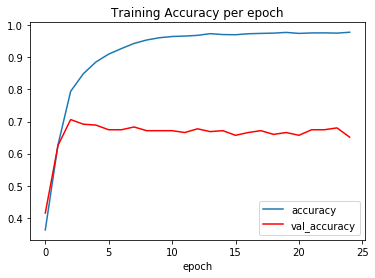

In [37]:
# Answer here
ax = plt.gca()

training_log.plot(kind='line',x='epoch',y='accuracy',ax=ax, title='Training Accuracy per epoch')
training_log.plot(kind='line',x='epoch',y='val_accuracy', color='red', ax=ax)


plt.show()

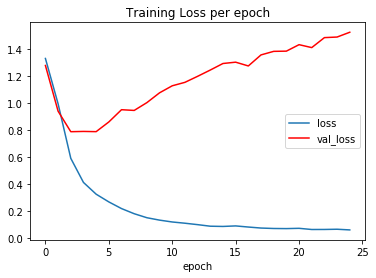

In [38]:
training_log.loss
training_log.val_loss
training_log.epoch

ax = plt.gca()

training_log.plot(kind='line',x='epoch',y='loss',ax=ax, title='Training Loss per epoch')
training_log.plot(kind='line',x='epoch',y='val_loss', color='red', ax=ax)


plt.show()


---

---
## 7. Word2Vector


### 7.1 Prepare training corpus

In [39]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
573,10573,@TDsNation I blame how broken madden is this year,"[@, TDsNation, I, blame, how, broken, madden, ..."
1094,20237,@MEAIndia: Virtually every statement by other ...,"[@, MEAIndia, :, Virtually, every, statement, ..."
3180,40353,"Everything is far away because time is short, ...","[Everything, is, far, away, because, time, is,..."
416,10416,@ashleighjessica @zacflint1 I'd give that pout...,"[@, ashleighjessica, @, zacflint1, I, 'd, give..."
791,10791,ESPN just assumed I wanted their free magazines,"[ESPN, just, assumed, I, wanted, their, free, ..."


In [40]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['@', 'TDsNation', 'I', 'blame', 'how', 'broken', 'madden', 'is', 'this', 'year']),
       list(['@', 'MEAIndia', ':', 'Virtually', 'every', 'statement', 'by', 'other', 'countries', 'at', '#', 'UN', 'has', 'referred', 'to', '#', 'terror', 'as', 'main', 'threat', 'to', 'peace', ',', '#', 'Pak', 'still', 'in', 'denial', '.']),
       list(['Everything', 'is', 'far', 'away', 'because', 'time', 'is', 'short', ',', 'no', 'rest', 'for', 'the', 'weary', '.'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [41]:
## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
573,10573,@TDsNation I blame how broken madden is this year,"[@, TDsNation, I, blame, how, broken, madden, ..."
1094,20237,@MEAIndia: Virtually every statement by other ...,"[@, MEAIndia, :, Virtually, every, statement, ..."
3180,40353,"Everything is far away because time is short, ...","[Everything, is, far, away, because, time, is,..."
416,10416,@ashleighjessica @zacflint1 I'd give that pout...,"[@, ashleighjessica, @, zacflint1, I, 'd, give..."
791,10791,ESPN just assumed I wanted their free magazines,"[ESPN, just, assumed, I, wanted, their, free, ..."


In [1]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model Word2Vec needs the WHOLE sentence because it looks at the context by using words around a specific words
word2vec_model = Word2Vec(sentences=training_corpus, 
                          size=vector_dim, window=window_size, 
                          min_count=min_count, iter=training_iter)

NameError: name 'training_corpus' is not defined

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [43]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']

In [44]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.most_similar(word, topn=topn)

[("'you", 0.9428086280822754),
 ('See', 0.9427238702774048),
 ('A4', 0.9417127370834351),
 ('Be', 0.9408063888549805),
 ('bday', 0.9407074451446533),
 ('Makes', 0.9374520182609558),
 ('kinda', 0.9369617700576782),
 ('bear', 0.9356104135513306),
 ('trusted', 0.9348659515380859),
 ('ukedchat', 0.934432327747345)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [45]:
from gensim.models import KeyedVectors

#Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True, limit=100000) #if i dont put a limit it crashes
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890128135681),
 ('pleased', 0.6632171273231506),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049768447876),
 ('satisfied', 0.6437950134277344),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247666478157043)]

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [46]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man']) #positive meaning adding, and negative is subtracting

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454),
 ('royal_palace', 0.5087165832519531)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [47]:
# Answer here
#We can add or subtract words from the sentence and the ones that have similar result will be clasified in the same label.


## High-dimension Visualization: t-SNE


### 9.1 Prepare visualizing target

In [48]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]   

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)



target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.1 Plot using t-SNE (2-dimension)

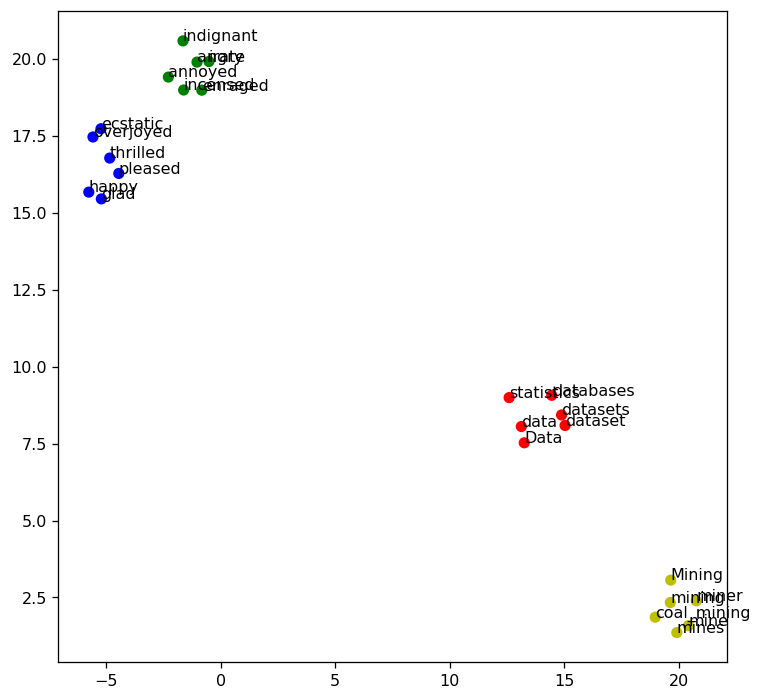

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).


target words: 
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry', 'happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'elated', 'thankful', 'unhappy', 'enthused', 'data', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'saddens_me', 'distressing', 'saddest', 'unfortunate', 'sorry', 'bittersweet', 'tragic', 'regretful', 'sadder', 'heartbroken', 'shameful', 'mining', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r',

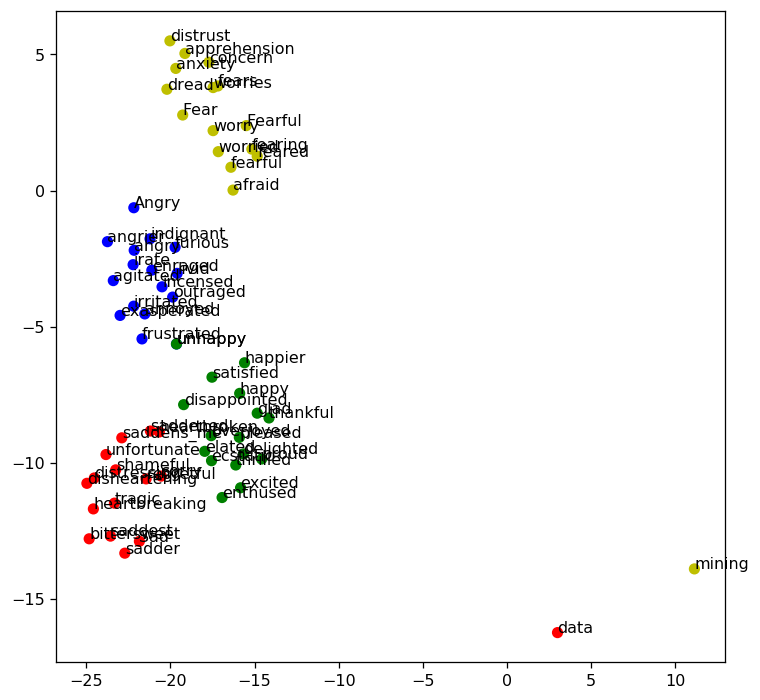

In [50]:
# Answer here
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
sad_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

target_words = angry_words + happy_words +  sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


## Code for the competition:

In [1]:
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np

### training data

tweets_df = pd.read_json('tweets_DM.json',lines=True)


#tweets_df = pd.read_json('kaggleData/tweets_DM.json')
tweets_unnested_df = json_normalize(tweets_df._source)
tweets_unnested_df = tweets_unnested_df.rename(index=str, columns={"tweet.hashtags":"hashtags",
                                      "tweet.text":"text",
                                     "tweet.tweet_id":"tweet_id"})

In [2]:
tweets_df[:5] #### TO DO: Create 1 DF with tweets, IDs and Emotions from the csv!!!

,_crawldate,_index,_score,_source,_type
0,2015-05-23 11:42:47,hashtag_tweets,391,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",tweets
1,2016-01-28 04:52:09,hashtag_tweets,433,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",tweets
2,2017-12-25 04:39:20,hashtag_tweets,232,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",tweets
3,2016-01-24 23:53:05,hashtag_tweets,376,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",tweets
4,2016-01-08 17:18:59,hashtag_tweets,989,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",tweets


In [3]:
tweets_unnested_df[:5]

,hashtags,text,tweet_id
0,[Snapchat],"People who post ""add me on #Snapchat"" must be ...",0x376b20
1,"[freepress, TrumpLegacy, CNN]","@brianklaas As we see, Trump is dangerous to #...",0x2d5350
2,[bibleverse],"Confident of your obedience, I write to you, k...",0x28b412
3,[],Now ISSA is stalking Tasha 😂😂😂 <LH>,0x1cd5b0
4,[],"""Trust is not the same as faith. A friend is s...",0x2de201


In [4]:
tweets = tweets_unnested_df

emotions_df = pd.read_csv('emotion.csv')
emotions_df[:5]

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation


In [5]:
tweetID = emotions_df.tweet_id

tweet_train = tweets[tweets['tweet_id'].isin(tweetID)] #Keeping only the training
tweet_test = tweets[~tweets['tweet_id'].isin(tweetID)]  #our testing set

tweet_train[:5]

print(tweet_test.shape)
print(tweet_train.shape)
print(emotions_df.shape)

(411972, 3)
(1455563, 3)
(1455563, 2)


In [6]:
train = tweet_train.sort_values('tweet_id')
emotions = emotions_df.sort_values('tweet_id').emotion

train = train.reset_index(drop=True)       #reseting the indices so we can put them together with no NaN
emotions = emotions.reset_index(drop=True) #reseting the indices so we can put them together with no NaN

train['emotion'] = emotions   #adding emotion to training set


In [7]:
from sklearn.naive_bayes import MultinomialNB

In [8]:
train.text[:10] # now we see we have our training set finally

0     o m g Shut Up And Dance though #BlackMirror <LH>
1    On #twitch <LH> on the #Destinybeta #Destiny #...
2    A nice sunny wak this morning not many <LH> ar...
3    I'm one of those people who love candy corn......
4    @metmuseum What are these? They look like some...
5    Postive thinking is the only way to go followe...
6               Best Check I’ve had this year <LH> 👀🙏🙏
7                  Have not eaten since yesterday <LH>
8    Glad to know that Ahmedabad has been declared ...
9    John 15:9 As the Father has loved me, so have ...
Name: text, dtype: object

## STOP WORDS

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

def stopWords(text):
    tokens = []
    word_tokens = word_tokenize(text)
    for word in word_tokens:
        if ~(word in word_tokens): #string.find(word):
            tokens.append(word)
                
    return tokens



train['text'].apply(lambda x: [stopWords(x) for x in train.text])

#stop_words = set(stopwords.words('english')) 

#train['text'].apply(lambda x: [item for item in x if item not in stop_words])




## Bag of Words

In [12]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train['text'])
test_data_BOW_features = BOW_vectorizer.transform(tweet_test['text'])   ##### our test BOW

In [ ]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train['text'])

train_data_BOW_features_500 = BOW_500.transform(train['text'])


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split


#using BOW
nb = MultinomialNB()
nb.fit(train_data_BOW_features_500, train.emotion)

predicted = nb.predict(test_data_BOW_features)

In [ ]:
Dict = {'id': tweet_test.tweet_id ,'emotion': predicted}

df = pd.DataFrame(Dict, columns = ['id', 'emotion'])

In [ ]:
print(df.shape)
df[:5]

In [ ]:
df.to_csv('submission.csv',index=False)

## BOW on Hashtags

In [11]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train.hashtags)

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train['hastags'])
test_data_BOW_features = BOW_vectorizer.transform(tweet_test['hastags'])   ##### our test BOW

AttributeError: 'list' object has no attribute 'lower'

## TF-IDF

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer #TF-IDF
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

vectorizer_TFIDF = TfidfVectorizer()
vectorizer_TFIDF.fit(train['text']) ###
features_training = vectorizer_TFIDF.fit_transform(train.text)
features_test = vectorizer_TFIDF.transform(tweet_test.text)


IF_IDF_1000=TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
IF_IDF_1000.fit(train['text'])
train_data_IF_IDF_1000 = IF_IDF_1000.transform(train['text'])



nb = MultinomialNB()

#nb.fit(train_data_IF_IDF_1000, train.emotion)

nb.fit(features_training, train.emotion)

predicted = nb.predict(features_test)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer #TF-IDF
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

# build analyzers (bag-of-words)
TFIDF_vectorizer = CountVectorizer() 
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
TFIDF_vectorizer.fit(tweets['text'])

# 2. Transform documents to document-term matrix.
train_data_TFIDF_features = TFIDF_vectorizer.fit_transform(train['text'])
test_data_TFIDF_features = TFIDF_vectorizer.transform(tweet_test['text'])   ##### our test BOW



import nltk

# build analyzers (bag-of-words)
TFIDF_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
TFIDF_500.fit(train['text'])

train_data_TFIDF_features_500 = TFIDF_500.transform(train['text'])




nb = MultinomialNB()

nb.fit(train_data_TFIDF_features, train.emotion)

#nb.fit(features_training, train.emotion)

predicted = nb.predict(features_test)

In [14]:
print(features_test[1])

  (0, 784531)	0.08573932477506893
  (0, 724932)	0.41216614125787554
  (0, 691896)	0.07078823796862567
  (0, 647453)	0.1762107380960181
  (0, 608351)	0.1911922268550613
  (0, 568559)	0.2505531251679104
  (0, 509975)	0.12445069025580538
  (0, 466839)	0.2686932299322978
  (0, 411793)	0.07036250726606223
  (0, 342053)	0.26761743726551407
  (0, 333360)	0.0926481135739295
  (0, 310173)	0.40826801095521714
  (0, 257770)	0.201023209423092
  (0, 235398)	0.37393739415114113
  (0, 145972)	0.32605791632336606
  (0, 64074)	0.14872999580960894
  (0, 58558)	0.1979418608516861


In [11]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

nb.fit(train_data_TFIDF_features, train.emotion)

#nb.fit(features_training, train.emotion)

predicted = nb.predict(test_data_TFIDF_features)

NameError: name 'train_data_TFIDF_features' is not defined

In [12]:
Dict = {'id': tweet_test.tweet_id ,'emotion': predicted}

df = pd.DataFrame(Dict, columns = ['id', 'emotion'])

df.to_csv('TF-IDF_submission.csv',index=False)

## DNN

In [13]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train['text'])
y_train = train['emotion']

X_test = BOW_500.transform(tweet_test['text'])
#y_test = tweet_test['emotion']


Using TensorFlow backend.
C:\Users\Noa\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Noa\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Noa\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Noa\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: Fu

NameError: name 'BOW_500' is not defined

In [14]:
import keras #trying with TFIDF

# standardize name (X, y) 
X_train = IF_IDF_1000.transform(train['text'])
y_train = train['emotion']

X_test = IF_IDF_1000.transform(tweet_test['text'])
#y_test = tweet_test['emotion']


In [15]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
#y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)


check label:  ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']

## Before convert
y_train[0:4]:
 0             joy
1    anticipation
2             joy
3             joy
Name: emotion, dtype: object

y_train.shape:  (1455563,)


## After convert
y_train[0:4]:
 [[0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]

y_train.shape:  (1455563, 8)


In [16]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_) #500 features from the BOW
print('output_shape: ', output_shape) #label [0,0,0,1] for example

input_shape:  1000
output_shape:  8


In [17]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                64064     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_2 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 520       
_________________________________________________________________
softmax_1 (Softmax)          (None, 8)                 0   

In [18]:
train.emotion.shape

(1455563,)

In [19]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
#history = model.fit(X_train, y_train, 
#                    epochs=epochs, 
#                    batch_size=batch_size, 
#                    callbacks=[csv_logger], validation_data = (0.25,0.25))
#                    validation_data = (X_test, y_test))

history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger])



print('training finish')

Epoch 1/25
1455563/1455563 [==============================] - 154s 106us/step - loss: 1.3625 - accuracy: 0.5046
Epoch 2/25
1455563/1455563 [==============================] - 156s 107us/step - loss: 1.3097 - accuracy: 0.5224
Epoch 3/25
1455563/1455563 [==============================] - 148s 102us/step - loss: 1.2954 - accuracy: 0.5284
Epoch 4/25
1455563/1455563 [==============================] - 155s 106us/step - loss: 1.2873 - accuracy: 0.5308
Epoch 5/25
1455563/1455563 [==============================] - 163s 112us/step - loss: 1.2818 - accuracy: 0.5335
Epoch 6/25
1455563/1455563 [==============================] - 148s 102us/step - loss: 1.2777 - accuracy: 0.5347
Epoch 7/25
1455563/1455563 [==============================] - 111s 76us/step - loss: 1.2745 - accuracy: 0.5360
Epoch 8/25
1455563/1455563 [==============================] - 146s 100us/step - loss: 1.2719 - accuracy: 0.5371
Epoch 9/25
1455563/1455563 [==============================] - 115s 79us/step - loss: 1.2698 - accuracy: 0

In [20]:
pred_result = model.predict(X_test)

In [21]:
pred_result = label_decode(label_encoder, pred_result)

C:\Users\Noa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [22]:
Dict = {'id': tweet_test.tweet_id ,'emotion':pred_result}

df = pd.DataFrame(Dict, columns = ['id', 'emotion'])

df.to_csv('DNN_submission.csv',index=False)

## KMean

In [26]:
from gensim.models import Word2Vec
from nltk.cluster import KMeansClusterer
import nltk
from sklearn import cluster
from sklearn import metrics


model = Word2Vec(tweet_test.text, min_count=1, size = 300)
 
# get vector data
X = model[model.wv.vocab]


NUM_CLUSTERS=8
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print (assigned_clusters)
 
words = list(model.wv.vocab)
for i, word in enumerate(words):  
    print (word + ":" + str(assigned_clusters[i]))
 
 
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

C:\Users\Noa\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


C:1
o:0
n:0
f:0
i:0
d:0
e:0
t:0
 :0
y:0
u:0
r:0
b:0
c:0
,:0
I:0
w:0
k:0
g:0
h:0
a:0
l:0
v:0
m:0
s:0
.:1
(:0
P:1
1:0
::1
2:0
):0
3:0
/:0
4:0
#:1
<:5
L:2
H:5
>:5
":1
T:1
A:1
~:1
p:0
W:1
?:1
G:1
Y:1
O:1
U:1
j:0
S:1
’:0
😡:5
😒:5
!:1
@:1
J:1
x:0
B:1
R:1
E:1
N:1
-:0
D:1
5:0
😭:5
✊:7
🏼:6
👯:6
M:1
':0
🤷:7
🏾:6
‍:7
♂:7
️:7
😂:5
X:1
F:1
V:1
9:0
_:1
0:0
q:0
😩:5
$:0
🤦:7
♀:7
7:0
8:0
😍:6
z:0
🌻:6
🥀:2
6:0
K:1
Q:1
🤢:5
🥗:6
&:0
;:0
😫:5
😤:5
🙏:7
🏻:6
£:0
♡:3
😾:2
😰:5
💞:6
❤:4
💘:6
😊:6
🙌:7
💖:6
💕:6
😯:5
💁:7
😆:6
😃:6
“:1
”:0
👇:7
✨:6
Z:1
🖕:7
🙄:5
…:5
é:1
😑:5
🏃:7
😱:5
😬:5
💯:6
%:0
🌈:6
🙂:6
👌:7
🏀:6
😅:5
🙃:5
♥:4
👎:7
💜:6
🏽:6
😋:6
🤣:5
⭐:4
*:0
👊:7
😌:6
☔:4
😮:5
😷:5
😞:5
😀:6
🍿:2
💰:6
💔:5
🕺:7
🎉:6
🎊:6
😎:6
😨:5
❣:4
🐶:6
🎭:6
🏿:7
🍃:6
–:1
🍷:6
☕:4
😇:6
😢:5
🎄:6
🎅:7
‘:0
😈:6
📱:6
👍:7
😄:6
😝:5
😁:6
✌:7
—:1
+:0
💗:6
🎧:6
🎶:6
☹:4
💪:7
💦:6
😕:5
🆘:2
💭:5
=:0
 :1
|:1
😳:5
🙈:5
😘:6
🍹:6
🍀:6
💀:5
म:3
ै:3
ं:3
भ:3
ा:3
र:3
त:3
ब:3
ो:2
ल:3
ह:3
ू:3
ँ:2
⚽:4
🤗:6
承:0
☀:4
🅰:4
🤘:7
è:2
👏:7
🤔:5
≠:2
👀:5
😉:6
🤙:7
💚:6
👑:6
😜:6
🏳:4
💥:6
æ:2
👩:7
🎓:7
[:1
]:1
🤞:7
💍:6
🔴:4
―:1
🤧:5
🃏:2
💛:6
💙:6


In [27]:
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
 
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)

Cluster id labels for inputted data
[7 3 3 ... 2 2 2]
Centroids data
[[ 1.53973281e-01 -1.71172190e-02 -1.30508959e-01 ...  4.82362043e-03
  -1.54294968e-01 -3.00679147e-01]
 [ 4.13199276e-01  4.30152938e-02 -8.02843690e-01 ...  8.87670070e-02
  -5.65312207e-01 -7.33821094e-01]
 [ 1.03425793e-02 -1.37745282e-02  3.51950526e-04 ...  9.74681228e-03
  -2.98042186e-02 -7.94876367e-02]
 ...
 [ 7.52659619e-01  6.39481366e-01 -1.08245805e-01 ... -1.11831538e-01
  -2.71378189e-01 -9.04694855e-01]
 [-1.94463015e-01 -1.72757292e+00 -5.66760182e-01 ...  3.79628092e-01
  -9.76276278e-01 -6.13880396e-01]
 [-7.61374056e-01 -2.23720640e-01 -1.12799428e-01 ... -5.59133589e-01
  -3.46031010e-01 -2.88622111e-01]]
Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-15250.898544341326
Silhouette_score: 
0.4707093


In [10]:
from gensim.models import Word2Vec
from nltk.cluster import KMeansClusterer
import nltk
from sklearn import cluster
from sklearn import metrics

model = Word2Vec(train.text, min_count=1, size = 300)
 
# get vector data
X = model[model.wv.vocab]


NUM_CLUSTERS=8
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print (assigned_clusters)
 
words = list(model.wv.vocab)
for i, word in enumerate(words):  
    print (word + ":" + str(assigned_clusters[i]))
 
 
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

C:\Users\Noa\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


o:5
 :5
m:5
g:5
S:7
h:5
u:5
t:5
U:7
p:5
A:7
n:5
d:5
D:7
a:5
c:5
e:5
#:7
B:7
l:5
k:5
M:7
i:5
r:5
<:1
L:1
H:1
>:1
O:7
w:5
s:5
y:5
b:5
2:5
G:7
T:7
W:7
P:7
4:5
,:5
f:5
.:4
::7
):7
I:7
':5
v:5
😁:0
😂:1
C:7
N:7
E:7
J:7
@:7
?:1
j:5
’:5
👀:1
🙏:4
☺:3
1:5
5:5
9:5
F:7
x:5
❤:3
️:4
🏽:0
7:5
0:5
6:5
-:7
R:7
V:7
Y:7
😭:1
🏼:0
🙌:4
(:7
K:7
3:5
!:7
😆:1
_:7
Z:7
👌:4
👍:4
✌:4
👏:4
😍:0
😘:0
💕:0
🕘:2
🇺:5
🇸:0
=:5
🇪:5
🇨:5
🇦:5
🇬:5
🇧:5
🇳:5
🇷:5
":7
~:7
q:5
“:7
&:5
”:7
🌕:0
z:7
8:5
¿:1
;:5
😴:1
/:5
😅:1
Q:7
😶:1
🎤:0
💙:0
|:6
💖:0
X:7
😒:1
🤷:4
‍:4
♂:3
🚢:0
🌊:0
👆:4
😉:0
💋:0
♥:3
🏾:0
👁:3
✊:4
💪:4
🚗:0
+:5
😜:1
🍷:0
🏻:0
…:7
😈:0
🔥:0
💜:0
🌘:0
😯:2
é:7
🎈:0
😊:0
🤤:1
💔:1
😠:1
स:2
्:2
व:2
र:2
ग:2
ज:2
न:2
त:2
→:6
＠:6
🙋:4
👊:4
💯:0
😩:1
👎:1
🙈:1
🦃:0
🍽:0
🍁:0
😎:0
💑:0
✨:0
✋:4
[:5
]:7
😕:1
🤣:1
💞:0
🍭:0
🍦:0
⛲:3
🌜:0
🤗:0
😔:1
😨:1
🐄:0
🐮:0
🎉:0
🤘:4
*:7
☝:4
😇:0
😃:0
🍾:0
🚀:0
🌻:0
🎂:0
😀:0
😛:0
💗:0
💝:0
á:6
$:5
—:7
💥:0
:7
🕊:3
£:5
‼:3
😋:0
🌴:0
⃣:3
😙:0
😌:0
🌲:0
🦅:0
✝:3
😄:0
😢:1
📷:0
🤔:1
🤓:0
‘:5
🤫:1
💣:0
•:6
 :7
✂:3
😡:1
💀:1
👻:0
🎃:0
🙄:1
😝:1
🏆:0
💭:1
😓:1
😑:1
😬:1
🤭:1
☕:3
🎼:0
💁:4
🌞:0
🐞:2
🌿

ⴄ:6
🗻:0
テ:2
マ:2
松:6
æ:6
ð:6
ھ:2
ڈ:6
ڑ:6
ٹ:6
ۓ:5
↕:3
🧣:6
μ:2
τ:6
λ:2
ή:2
ς:2
ᴺ:2
ᴼ:2
⁷:6
̇:6
🎌:6
러:6
ł:6
₩:6
ञ:6
ृ:6
🔢:0
침:6
ヾ:6
⌒:6
🛄:6
猫:6
㉫:6
ƒ:6
උ:6
Ï:6
:6
🏞:3
Ꮇ:2
Ꮆ:6
Ꮤ:6
Ѵ:2
↘:3
＞:6
­:6
橋:6
一:6
つ:6
譲:6
妄:6
想:6
麗:6
斗:6
ण:6
癒:2
ヘ:6
番:6
組:6
観:6
覧:6
ミ:6
ヌ:6
短:6
足:6
ホ:6
毛:6
物:6
🕑:6
ʻ:6
萩:6
花:6
井:6
형:6
🚜:0
🔦:3
下:6
健:6
二:6
👝:0
🕕:5
🥦:0
港:2
🚾:6
🔽:3
神:6
牙:6
玄:6
徳:6
ㅣ:6
⛔:3
📎:6
턴:6
즈:6
セ:2
ヨ:6
🔟:6
👞:0
🔡:6
☞:6
🎽:6
ત:6
મ:6
જ:6
ર:6
恥:6
辱:6
ń:6
♰:5
ゲ:2
☣:3
➿:6
◡:6
✿:6
音:6
才:6
🔃:0
℃:1
恋:6
両:6
思:6
卒:6
鹹:6
魚:6
उ:6
ﷻ:6
ข:2
̀:6
́:6
핑:6
ネ:6
◈:6
✱:6
떡:2
⚱:3
⮆:6
⩑:6
⤴:3
＇:2
ｍ:2
ｃ:2
ｂ:2
🕋:6
͞:6
⮄:6
⭧:5
➣:7
ɮ:0
㋡:6
❉:6
＼:2
ˆ:6
／:6
ᘮ:6
☱:6
ר:7
ओ:2
వ:6
ే:6
క:6
ക:6
ം:6
Π:6
ά:6
Γ:6
빈:6
차:6
❍:6
ゞ:6
ஸ:2
ึ:2
복:6
Ἰ:6
ῦ:6
バ:6
✣:6
怒:6
涙:6
～:6
魔:6
四:2
🕗:3
ọ:6
ị:6
ụ:6
∀:6
छ:6
आ:2
झ:6
Ď:6
Ã:6
Ў:6
Ř:6
Ẹ:6
Ŝ:0
긔:6
엽:6
겼:6
🧔:4
ㅡ:6
◇:6
↳:6
◄:6
☡:4
‽:6
α:6
κ:6
基:6
督:6
教:6
頌:6
恩:6
堂:6
ँ:2
╖:2
╥:2
🎗:3
🕖:6
Ꮖ:6
Ꮋ:6
Ꭼ:6
Ᏼ:6
Ꭵ:6
Ꮑ:6
Ꭺ:6
Ꭰ:6
ء:6
朴:6
珍:6
荣:6
🚅:6
함:6
께:6
眠:6
寒:6
起:6
謝:6
🚄:6
:6
:6
:6
:6
:6
:6
:6
:6
録:6
画:6


In [24]:
word = train[0:1].text
word_vec = model.wv[word]
kmeans_model.predict([word_vec])

KeyError: "word 'o m g Shut Up And Dance though #BlackMirror <LH>' not in vocabulary"

In [12]:
train[:100]

,hashtags,text,tweet_id,emotion
0,[BlackMirror],o m g Shut Up And Dance though #BlackMirror <LH>,0x1c7f10,joy
1,"[twitch, Destinybeta, Destiny, Destiny2, Desti...",On #twitch <LH> on the #Destinybeta #Destiny #...,0x1c7f11,anticipation
2,[],A nice sunny wak this morning not many <LH> ar...,0x1c7f14,joy
3,"[Confession, NationalCandyCornDay, CouldEatThe...",I'm one of those people who love candy corn......,0x1c7f15,joy
4,[],@metmuseum What are these? They look like some...,0x1c7f16,disgust
5,"[LawOfAttraction, ask, receive, dreambig]",Postive thinking is the only way to go followe...,0x1c7f19,anticipation
6,[],Best Check I’ve had this year <LH> 👀🙏🙏,0x1c7f1a,joy
7,[],Have not eaten since yesterday <LH>,0x1c7f1b,anticipation
8,[World],Glad to know that Ahmedabad has been declared ...,0x1c7f1c,trust
9,[scriptureverse],"John 15:9 As the Father has loved me, so have ...",0x1c7f1d,joy


In [11]:
from nltk.cluster import KMeansClusterer
import nltk

count_vect = CountVectorizer()
test_vector = count_vect.fit_transform(tweet_test.text)
analyze = count_vect.build_analyzer() #changes to lower case and ommits punctuation
word_vec = analyze(" ".join(list(tweet_test.text)))
print(word_vec[0])

NUM_CLUSTERS=8
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(word_vec, assign_clusters=True)
print (assigned_clusters)
# output: [0, 2, 1, 2, 2, 1, 2, 2, 0, 1, 0, 1, 2, 1, 2]

NameError: name 'CountVectorizer' is not defined

In [ ]:
# clustering target
target_list = 
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

In [ ]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

In [ ]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

In [ ]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

In [ ]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

In [15]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


def preprocessing(line):
    line = line.lower()
    line = re.sub(r"[{}]".format(str.punctuation), " ", line)
    return line



tfidf_vectorizer = TfidfVectorizer(preprocessor=preprocessing)
tfidf = tfidf_vectorizer.fit_transform(tweet_test)

kmeans = KMeans(n_clusters=8).fit(tfidf)

AttributeError: type object 'str' has no attribute 'punctuation'

## LSTM

In [9]:
import pandas as pd
import keras
import numpy as np


from keras.preprocessing.text import Tokenizer
#take most often 8000 words to word_dic
vocabulary_size = 5000
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(train['text'])

#transform words to a sequence
sequences = tokenizer.texts_to_sequences(train['text'])


Using TensorFlow backend.
C:\Users\Noa\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Noa\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Noa\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Noa\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: Fu

In [10]:
###check length of sequence
import matplotlib.pyplot as plt

text_len = [len(x) for x in sequences]
histo = pd.Series(text_len).value_counts()
histo.sort_index(inplace=True)
histo = pd.DataFrame(histo,columns = ['counts'])
histo[0:30].plot.bar(figsize=(8,6))
plt.xticks(rotation=360)
plt.show()

<Figure size 800x600 with 1 Axes>

In [11]:
#pad or cut each sequence to proper length
sequence_len = int(30) 

from keras.preprocessing.sequence import pad_sequences
train_df = train

train = pad_sequences(sequences, maxlen=sequence_len)

In [12]:
###Label encoding
from sklearn.preprocessing import MultiLabelBinarizer

le = MultiLabelBinarizer()

train_df.emotion = train_df.emotion.apply(lambda x :x.split('/'))
le.fit(train_df.emotion)

print('check label: ', le.classes_)
print('\n Before convert')
print('data[Task][0:4]:\n', train_df.emotion[0:4])
print('\n data[Task].shape: ', train_df.emotion.shape)
data_label = le.transform(train_df.emotion)
print('\n\n After convert')
print('data_label[0:4]:\n', data_label[0:4])
print('\n data_label.shape: ', data_label.shape)

check label:  ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']

 Before convert
data[Task][0:4]:
 0             [joy]
1    [anticipation]
2             [joy]
3             [joy]
Name: emotion, dtype: object

 data[Task].shape:  (1455563,)


 After convert
data_label[0:4]:
 [[0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0]]

 data_label.shape:  (1455563, 8)


In [13]:
###split train,valid set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, data_label, 
                                                    test_size=0.25,shuffle = True,random_state = 17)

In [14]:
###deep learning
#input is padded sequence,output is multi-label probability
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)
output_shape = len(le.classes_)
print('output_shape: ', output_shape)

from keras.models import Model
from keras.layers.core import Dense, Dropout
from keras.layers.embeddings import Embedding
from keras.layers import LSTM,Activation,concatenate,Input
from keras.models import load_model
from keras import optimizers 
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv1D,MaxPooling1D
from keras.callbacks import CSVLogger,EarlyStopping,ModelCheckpoint
csv_logger = CSVLogger('training_log.csv')

#use GPU to accelerate training
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

#hyper parameters
learning_rate = 0.001
epochs = 50
batch_size = 32

#build CNN-LSTM model(activation of last Dense use 'sigmoid',for multilabel)
model_input = Input(shape = (input_shape,))
embed = Embedding(output_dim=96,
                    input_dim=vocabulary_size+1, 
                    input_length=input_shape)(model_input)

BN1 = BatchNormalization()(embed)
cnn1=Conv1D(filters=64, kernel_size=1,padding='valid',activation='relu')(BN1)                     
MP1 = MaxPooling1D(pool_size=2)(cnn1)

cnn3=Conv1D(filters=64, kernel_size=3,padding='valid',activation='relu')(BN1)                
MP3 = MaxPooling1D(pool_size=2)(cnn3)

cnn5=Conv1D(filters=64, kernel_size=5,padding='valid',activation='relu')(BN1)                    
MP5 = MaxPooling1D(pool_size=2)(cnn5)

#cnn7=Conv1D(filters=64, kernel_size=7,padding='valid',activation='relu')(BN1)                    
#MP7 = MaxPooling1D(pool_size=2)(cnn7)

cnn_out = concatenate([MP1,MP3,MP5], axis=-2)
LSTM1 = LSTM(units=128,unroll = True, recurrent_initializer='orthogonal',
             return_sequences=False,
               dropout=0.2, recurrent_dropout=0.2)(cnn_out)
LSTM1_BN = BatchNormalization()(LSTM1)
FC1 = Dense(units=512)(LSTM1_BN)
FC1_BN = BatchNormalization()(FC1)

Activate  = Activation('relu')(FC1_BN)
Drop = Dropout(0.5)(Activate)
FC2 = Dense(units=output_shape,activation='sigmoid' )(Drop)
model = Model(inputs=model_input, outputs=FC2)

print(model.summary())

input_shape:  30
output_shape:  8
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 30, 96)       480096      input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 30, 96)       384         embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 30, 64)       6208        batch_normalization_1[0][0]      
__________________________________________________________

In [15]:
# define loss function & optimizer(loss function use binary-crossentropy,for 0 1)
adam = optimizers.Adam(lr=learning_rate)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#callback csv_logger,Modelcheckpoint and Earlystopping
earlystopping=EarlyStopping(monitor='val_loss', patience=3, verbose=0, mode='auto')
BEST_MODEL_DIR = "C:/Users/Noa/Desktop/Homework/zOthers/projects/lstm.h5"
save_best = ModelCheckpoint(BEST_MODEL_DIR, monitor='val_loss', verbose=0, 
                            save_best_only=True, save_weights_only=False, mode='auto', period=1)
#train the model
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger,earlystopping,save_best],
                    validation_data = (X_test, y_test))
print('training finish')

###predict on public test set and creat submission file
#load the model
SAVE_MODEL_DIR = "C:/Users/user/Downloads/DM_Chung/best_cnn_lstm.h5"
model = load_model(SAVE_MODEL_DIR)
#tokenize test data and generate the sequence 
test_sequences = tokenizer.texts_to_sequences(testdata['Abstract'])
_testdata = pad_sequences(test_sequences, maxlen=sequence_len)
pred_result = model.predict(_testdata, batch_size=512)


C:\Users\Noa\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1091672 samples, validate on 363891 samples
Epoch 1/50
1091672/1091672 [==============================] - 3988s 4ms/step - loss: 0.2588 - accuracy: 0.9006 - val_loss: 0.2387 - val_accuracy: 0.9071
Epoch 2/50
1091672/1091672 [==============================] - 3773s 3ms/step - loss: 0.2429 - accuracy: 0.9058 - val_loss: 0.2356 - val_accuracy: 0.9080
Epoch 3/50
1091672/1091672 [==============================] - 3789s 3ms/step - loss: 0.2388 - accuracy: 0.9072 - val_loss: 0.2339 - val_accuracy: 0.9086
Epoch 4/50
1091672/1091672 [==============================] - 3682s 3ms/step - loss: 0.2361 - accuracy: 0.9083 - val_loss: 0.2327 - val_accuracy: 0.9091
Epoch 5/50
1091672/1091672 [==============================] - 3555s 3ms/step - loss: 0.2338 - accuracy: 0.9091 - val_loss: 0.2323 - val_accuracy: 0.9095
Epoch 6/50
1091672/1091672 [==============================] - 3557s 3ms/step - loss: 0.2323 - accuracy: 0.9097 - val_loss: 0.2321 - val_accuracy: 0.9092
Epoch 7/50
1091672/1091672 [=

OSError: Unable to open file (unable to open file: name = 'C:/Users/user/Downloads/DM_Chung/best_cnn_lstm.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [16]:

###predict on public test set and creat submission file
#load the model
SAVE_MODEL_DIR = "C:/Users/Noa/Desktop/Homework/zOthers/projects/lstm.h5"
model = load_model(SAVE_MODEL_DIR)
#tokenize test data and generate the sequence 
test_sequences = tokenizer.texts_to_sequences(testdata['Abstract'])
_testdata = pad_sequences(test_sequences, maxlen=sequence_len)
pred_result = model.predict(_testdata, batch_size=512)

C:\Users\Noa\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


NameError: name 'testdata' is not defined

In [ ]:
from sklearn.preprocessing import binarize
#cut a threshold to turn probability predieted by model to multi-label
threshold = 0.3
pred_result_bi = binarize(pred_result,threshold)
pred_result_bi = pd.DataFrame(pred_result_bi,columns = le.classes_)
#turn float to int
for c in le.classes_:
    pred_result_bi[c]=pred_result_bi[c].apply(lambda x:int(x))

submit= pd.read_csv('task1_sample_submission.csv')
submit[['BACKGROUND','OBJECTIVES','METHODS',
        'RESULTS','CONCLUSIONS','OTHERS']] = pred_result_bi[['BACKGROUND','OBJECTIVES','METHODS'
                                         ,'RESULTS','CONCLUSIONS','OTHERS']]
submit.fillna('0',inplace = True)
submit.to_csv('3CNN64_LSTM128_em96_batch32_thr0.3.csv',index = 0)